In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('../data/data.csv')

In [119]:
# let's delete the two unnecessary columns
df.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [120]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [121]:
df.sample(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
147,0,14.95,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,0.1744,...,16.25,25.47,107.10,809.7,0.0997,0.25210,0.25000,0.08405,0.2852,0.09218
426,0,10.48,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.022180,0.1925,...,12.13,21.57,81.41,440.4,0.1327,0.29960,0.29390,0.09310,0.3020,0.09646
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.34030,0.14180,0.2218,0.07820
332,0,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
94,1,15.06,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
124,0,13.37,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,0.1422,...,14.26,22.75,91.99,632.1,0.1025,0.25310,0.33080,0.08978,0.2048,0.07628


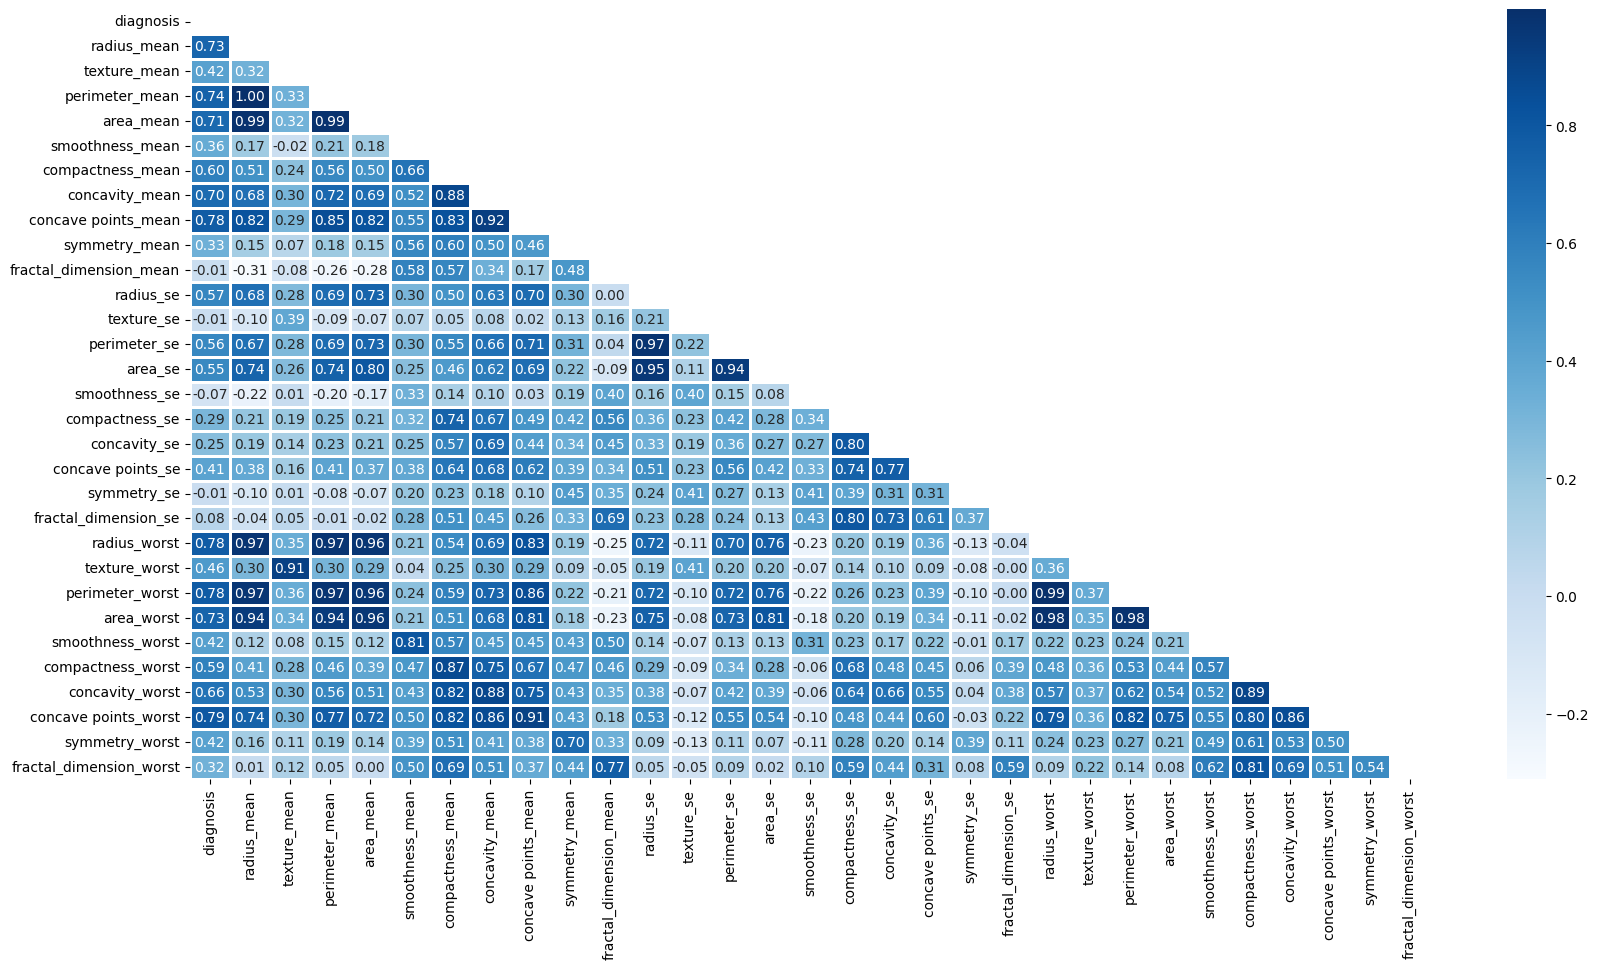

In [122]:
# Let's check the correlation between the variables 

plt.figure(figsize=(20, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [123]:
# features with higher than threshold(0.96) correlation
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
triu_df = corr_matrix.mask(mask)
high_corr = [x for x in triu_df.columns if any(triu_df[x] > 0.96)]
high_corr


['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'radius_worst',
 'perimeter_worst']

In [124]:
# drop the highly correlated  columns
df1 = df.drop(columns=high_corr, axis=1)

In [125]:
df1.shape[-1]

25

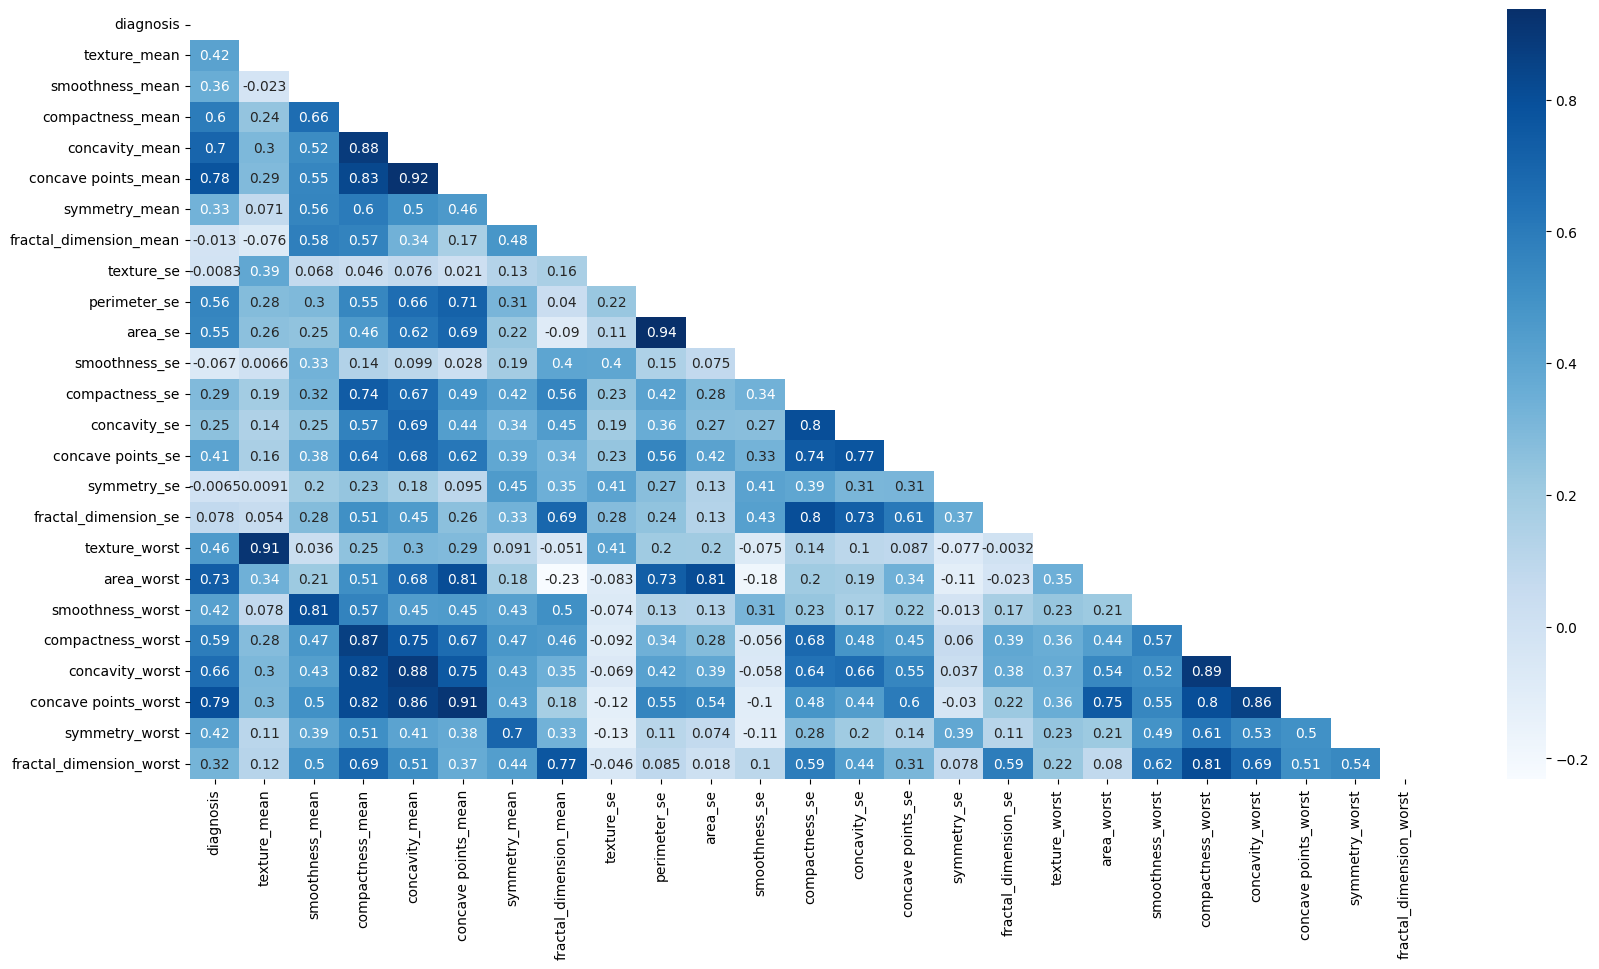

In [126]:
# noe see the graph
plt.figure(figsize=(20, 10))
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues')
plt.show()

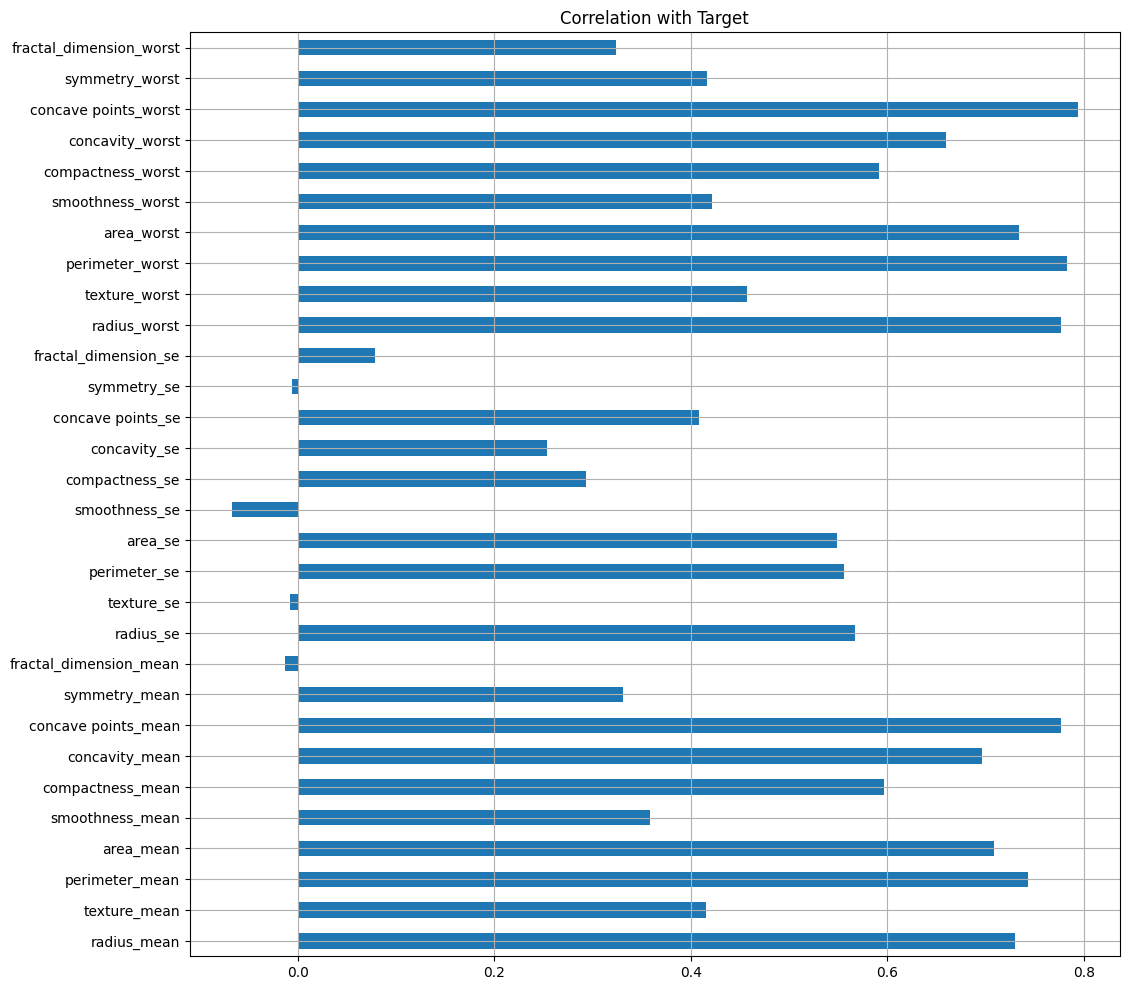

In [127]:
# correlation with target
df.drop('diagnosis', axis=1).corrwith(df['diagnosis']).plot(kind='barh', grid=True, figsize=(12, 12), title="Correlation with Target")
plt.show()

In [238]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [239]:
from sklearn import set_config
set_config(display='diagram', transform_output='pandas')

In [240]:
scaler_array = scaler.fit_transform(df.iloc[:, 1:])
scaler_array

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [241]:
dfs = scaler_array

In [242]:
# Getting Mean Columns with diagnosis
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [243]:
dfs[mean_col].sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
210,1.832661,0.663296,1.760097,1.806321,-0.388583,0.577243,0.944142,1.204343,-0.170202,-1.780172
512,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735
467,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463
266,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453
415,-0.635423,0.437570,-0.641704,-0.628800,0.097477,-0.438556,-0.794093,-0.699769,0.757138,0.014515


In [244]:
df.loc[:, "diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [245]:
dfs = pd.concat([dfs, df.loc[:, "diagnosis"]], axis=1)

In [246]:
df.sample()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
91,1,15.37,22.76,100.2,728.2,0.092,0.1036,0.1122,0.07483,0.1717,...,16.43,25.84,107.5,830.9,0.1257,0.1997,0.2846,0.1476,0.2556,0.06828


In [256]:
# Getting Mean Columns with diagnosis
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


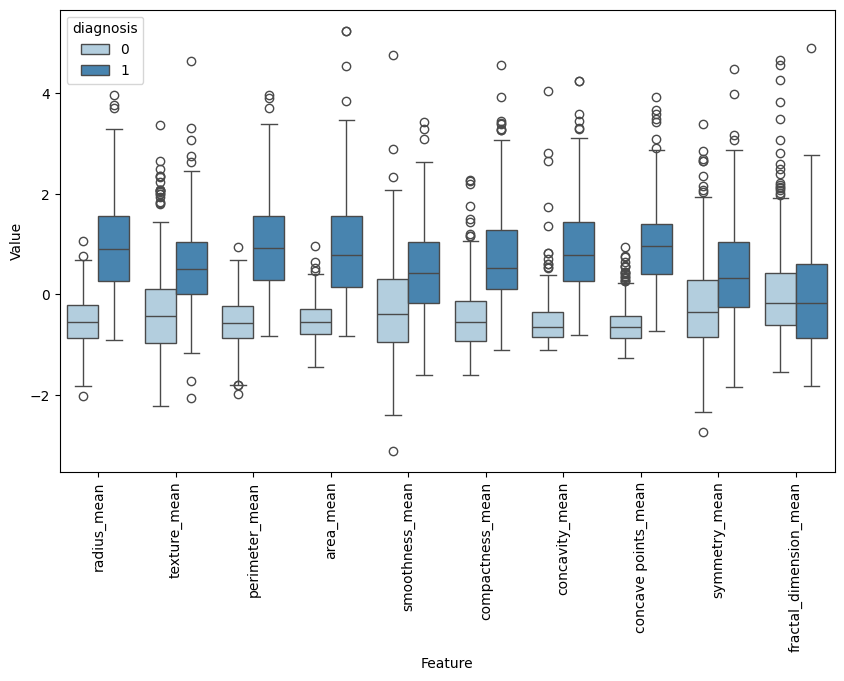

In [257]:
# Melt the DataFrame to long format
df_long = pd.melt(dfs, id_vars=['diagnosis'], value_vars=mean_col, 
                  var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Feature', y='Value', hue='diagnosis', palette='Blues')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [250]:
print(type(dfs))


<class 'pandas.core.frame.DataFrame'>


In [252]:

# Getting Se Columns with diagnosis
se_col = ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']


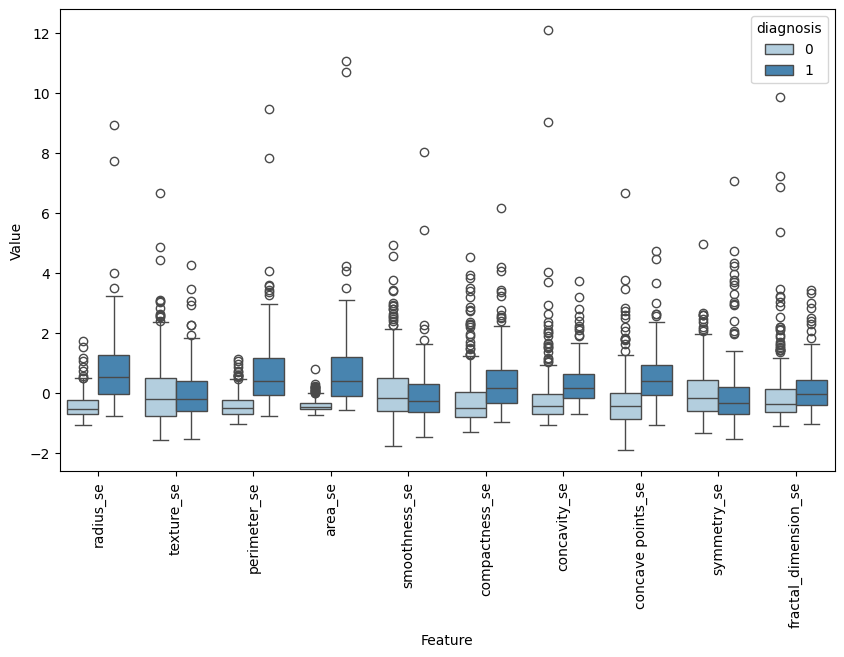

In [253]:
# Melt the DataFrame to long format
df_long = pd.melt(dfs, id_vars=['diagnosis'], value_vars=se_col, 
                  var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Feature', y='Value', hue='diagnosis', palette='Blues')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [254]:

# Getting Worst column with diagnosis
worst_col = ['diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

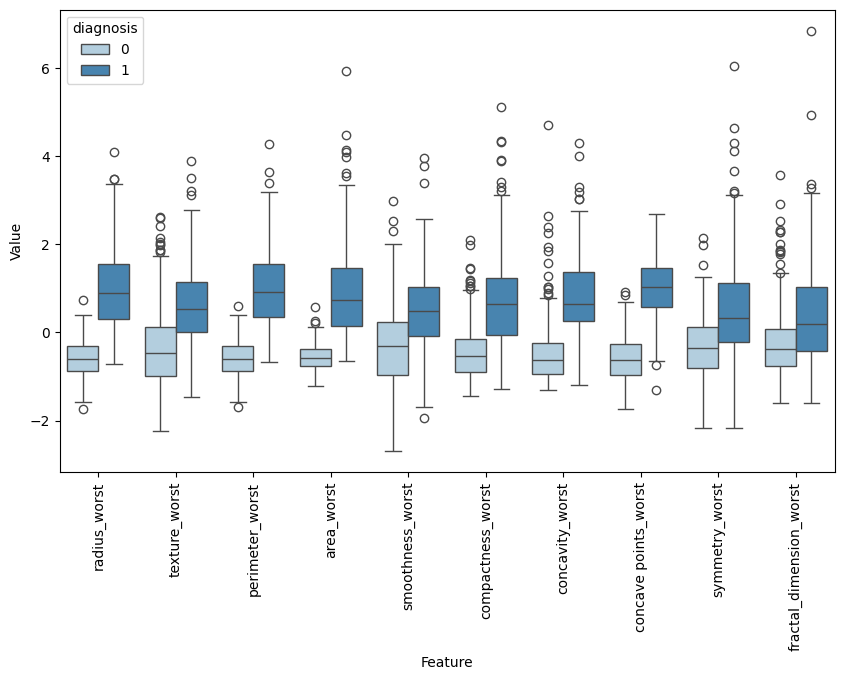

In [255]:
# Melt the DataFrame to long format
df_long = pd.melt(dfs, id_vars=['diagnosis'], value_vars=worst_col, 
                  var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Feature', y='Value', hue='diagnosis', palette='Blues')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


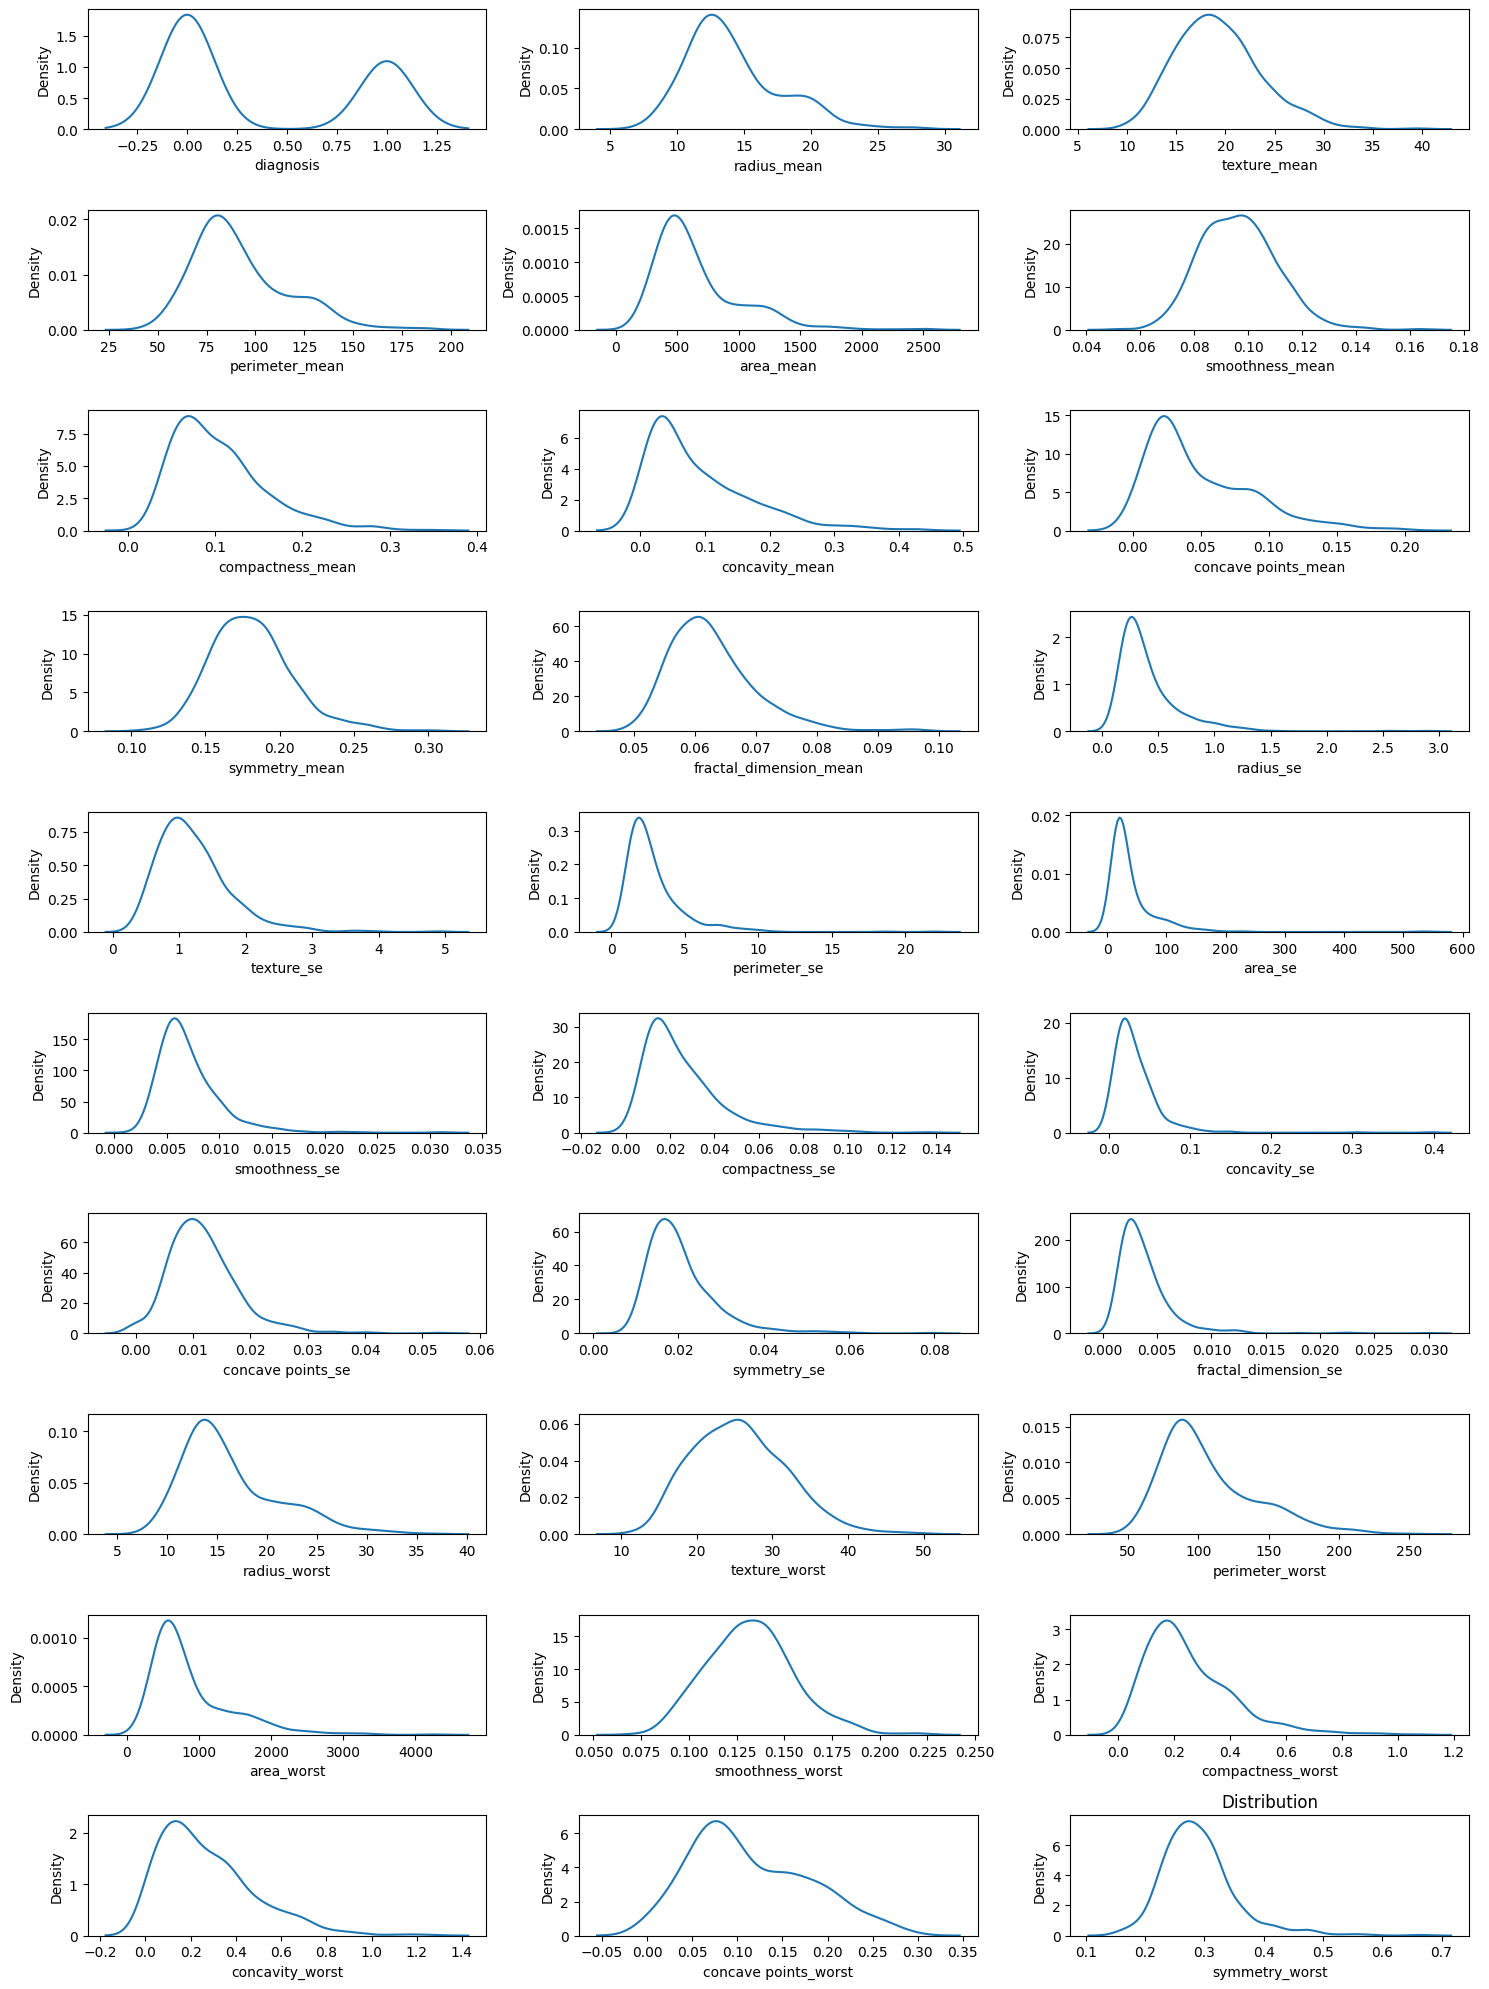

In [288]:
plt.figure(figsize=(15, 20))
graphs = 1

for col in df:
    if graphs <= 30:
        ax = plt.subplot(10, 3, graphs)
        sns.kdeplot(df[col])
        plt.xlabel(col)
    
    graphs += 1

plt.title("Distribution")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from collections import Counter

def detect_outliers(dataframe, features):
    """Detects outliers in specified columns using the IQR method"""
    
    outlier_indices = []  # List to store all the outlier indices
    
    for col in features:
        # Calculate Q1, Q3 and IQR
        q1 = np.percentile(dataframe[col], 25)
        q3 = np.percentile(dataframe[col], 75)
        iqr = q3 - q1
        
        # Define the step for outlier detection
        outlier_step = iqr * 1.5
        
        # Get indices of outliers in the column
        outliers_in_col = dataframe[(dataframe[col] < q1 - outlier_step) | (dataframe[col] > q3 + outlier_step)].index
        
        # Append these outlier indices to the list
        outlier_indices.extend(outliers_in_col)
    
    # Count how many times each index is considered an outlier (it could be in multiple columns)
    outlier_count = Counter(outlier_indices)
    
    # We consider as "multiple outliers" those indices that appear more than 99.7% of the times
    multiple_outliers = [index for index, count in outlier_count.items() if count > len(features) * 0.997]
    
    return multiple_outliers


In [296]:
df1.loc[detect_outliers(df1,
      ['texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst',
      'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])]

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


- High Sensitivity data 
- Assumption normal distribution (beside some columns)
- it means all the outliers are in within the 3 standard deviation
- so i decide not to deleted any data 